# What is the most optimal skill to learn for Data Analysts?

## Methodology
- Continue from last notebook to find percent of postings with skill
- Visualize median salary vs percent skill demand
- (Optional) Determine if certain technologies are more prevalent

## Import Libraries and Data
Import the libraries, data and change the job_posted_date to a datetime type.

In [154]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading the Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Optimal Skill to learn for United States

## Clean Data

Filters the original dataset to only get rows where the job title is `Data Analyst` and the country is `United States`, to create a new DataFrame `df_DA_US`. 

Drop `NaN values` from the `salary_year_avg` column. Then it uses the explode method on the `job_skills` column to create a new row in a new DataFrame `df_DA_US_exploded` for each skill associated with a job. 

Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns.

In [155]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


### Calculate Percent of Job Postings that Have Skills

Group the data by `job skills` and calculates the `count` and `median` salary for each skill, sorting the results in descending order by count. It then renames the columns. 

Calculates the `percentage` that each skill count represents out of the total number of Data Analyst jobs. 

Finally, filter out any skills that don't have any jobs associated with them.

In [156]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# Find count of Data Analyst jobs in US with salary info
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = 100 * df_DA_skills['skill_count'] / DA_job_count

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


Filters for Data Analyst skills that exceed a certain percentage (`skill_limit`).

In [157]:
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Median Salary vs Percent Skill Demand

Create a `scatter plot` to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

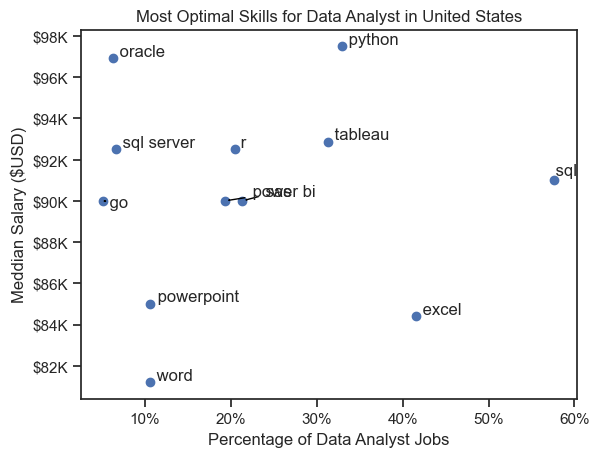

In [158]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.title("Most Optimal Skills for Data Analyst in United States")
plt.xlabel("Percentage of Data Analyst Jobs")
plt.ylabel("Meddian Salary ($USD)")

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i]," " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), force_text=(0.5, 0.5))

plt.show()

### Coloring by Technology
We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [159]:
df_technology = df['job_type_skills'].copy()

# Remove any duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)        # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:          # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value   
        else:                               # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ms access',
  'ssrs',
  'qlik',
  'sas',
  'power bi',
  'cognos',
  'dax',
  'microstrategy',
  'ssis',
  'alteryx',
  'spss',
  'powerbi',
  'sharepoint',
  'looker',
  'visio',
  'tableau',
  'sap',
  'datarobot',
  'msaccess',
  'outlook',
  'powerpoint',
  'splunk',
  'sheets',
  'word',
  'spreadsheet',
  'excel',
  'esquisse',
  'nuix'],
 'programming': ['scala',
  'crystal',
  't-sql',
  'golang',
  'apl',
  'groovy',
  'clojure',
  'sas',
  'julia',
  'swift',
  'solidity',
  'php',
  'f#',
  'vba',
  'powershell',
  'erlang',
  'vb.net',
  'kotlin',
  'pascal',
  'lisp',
  'css',
  'r',
  'nosql',
  'haskell',
  'go',
  'javascript',
  'typescript',
  'ocaml',
  'fortran',
  'rust',
  'objective-c',
  'sass',
  'shell',
  'cobol',
  'html',
  'elixir',
  'matlab',
  'python',
  'c++',
  'c',
  'no-sql',
  'delphi',
  'java',
  'assembly',
  'mongo',
  'ruby',
  'dart',
  'sql',
  'visualbasic',
  'perl',
  'mongodb',
  'visual basic',
  'bash',
  'c#',
  '

This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [160]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,ssrs
0,analyst_tools,qlik
0,analyst_tools,sas
0,analyst_tools,power bi
...,...,...
9,sync,symphony
9,sync,microsoft teams
9,sync,mattermost
9,sync,zoom


Merges two DataFrames, `df_DA_skills` and `df_technology`, based on the columns `job_skills` and `skills` respectively, creating a new DataFrame `df_DA_skills_tech`.

In [161]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


Filters `df_DA_skills_tech` to select rows where the `percent` column exceeds a specified threshold, storing the result in `df_DA_skills_tech_high_demand`.

In [162]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


Plot the results in a scatter plot, coloring the points based on the `technology` column.

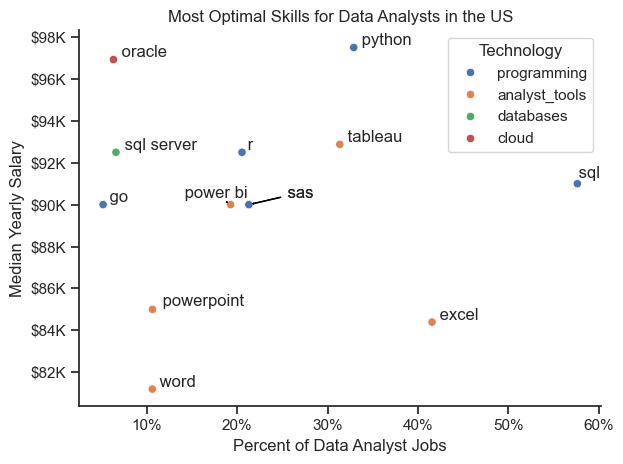

In [163]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.set_theme(style='ticks')

sns.scatterplot(
    data= df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_tech_high_demand['skills']):
    texts.append(plt.text(df_DA_skills_tech_high_demand['skill_percent'].iloc[i], df_DA_skills_tech_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), force_text=(0.4))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

## Optimal Skill to learn for India

## Clean Data

Filters the original dataset to only get rows where the job title is `Data Analyst` and the country is `India`, to create a new DataFrame `df_DA_IND`. 

Drop `NaN values` from the `salary_year_avg` column. Then it uses the explode method on the `job_skills` column to create a new row in a new DataFrame `df_DA_IND_exploded` for each skill associated with a job. 

Finally, it displays the first 5 entries of the `salary_year_avg` and `job_skills` columns.

In [164]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# # Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

df_DA_IND_exploded = df_DA_IND.explode('job_skills')

df_DA_IND_exploded[['job_skills', 'salary_year_avg']].head(5)

,job_skills,salary_year_avg
11412,python,50400.0
11412,sql,50400.0
11412,aws,50400.0
11412,azure,50400.0
11412,excel,50400.0


### Calculate Percent of Job Postings that Have Skills

Group the data by `job skills` and calculates the `count` and `median` salary for each skill, sorting the results in descending order by count. It then renames the columns. 

Calculates the `percentage` that each skill count represents out of the total number of Data Analyst jobs. 

Finally, filter out any skills that don't have any jobs associated with them.

In [165]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_IND_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

# Find count of Data Analyst jobs in India with salary info
DA_job_count = len(df_DA_IND)

df_DA_skills['skill_percent'] = 100 * df_DA_skills['skill_count'] / DA_job_count

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


Filters for Data Analyst skills that exceed a certain percentage (`skill_limit`).

Here, we limit the `skill_limit` to `11`, to reduce the output within the top 10 - 15 skills.

In [166]:
skill_limit = 11

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
power bi,17,111175.0,18.085106
azure,15,93600.0,15.957447
aws,12,79200.0,12.765957
oracle,11,79200.0,11.702128


### Median Salary vs Percent Skill Demand

Create a `scatter plot` to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

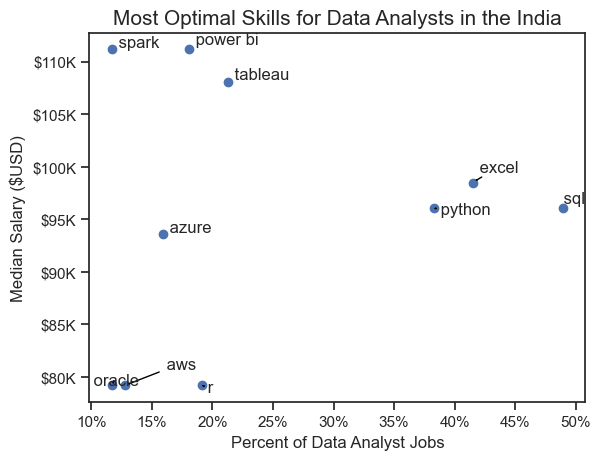

In [167]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.title("Most Optimal Skills for Data Analysts in the India", fontsize=15)
plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Salary ($USD)")

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), force_text=(0.5))

# Get current axes, set limits, and format axes
ax= plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

### Coloring by Technology
We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [172]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)        # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:          # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                               # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ms access',
  'ssrs',
  'qlik',
  'sas',
  'power bi',
  'cognos',
  'dax',
  'microstrategy',
  'ssis',
  'alteryx',
  'spss',
  'powerbi',
  'sharepoint',
  'looker',
  'visio',
  'tableau',
  'sap',
  'datarobot',
  'msaccess',
  'outlook',
  'powerpoint',
  'splunk',
  'sheets',
  'word',
  'spreadsheet',
  'excel',
  'esquisse',
  'nuix'],
 'programming': ['scala',
  'crystal',
  't-sql',
  'golang',
  'apl',
  'groovy',
  'clojure',
  'sas',
  'julia',
  'swift',
  'solidity',
  'php',
  'f#',
  'vba',
  'powershell',
  'erlang',
  'vb.net',
  'kotlin',
  'pascal',
  'lisp',
  'css',
  'r',
  'nosql',
  'haskell',
  'go',
  'javascript',
  'typescript',
  'ocaml',
  'fortran',
  'rust',
  'objective-c',
  'sass',
  'shell',
  'cobol',
  'html',
  'elixir',
  'matlab',
  'python',
  'c++',
  'c',
  'no-sql',
  'delphi',
  'java',
  'assembly',
  'mongo',
  'ruby',
  'dart',
  'sql',
  'visualbasic',
  'perl',
  'mongodb',
  'visual basic',
  'bash',
  'c#',
  '

This code converts a dictionary into a pandas DataFrame, then explodes the `skills` column, creating multiple rows for each 1technology1 entry if it contains multiple skills.

In [174]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,ssrs
0,analyst_tools,qlik
0,analyst_tools,sas
0,analyst_tools,power bi
...,...,...
9,sync,symphony
9,sync,microsoft teams
9,sync,mattermost
9,sync,zoom


Merges two DataFrames, `df_DA_skills` and `df_technology`, based on the columns `job_skills` and `skills` respectively, creating a new DataFrame `df_DA_skills_tech`.

In [176]:
# merge df_DA_skills and df_technology
df_DA_skills_tech_high_demand = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
5,17,111175.0,18.085106,analyst_tools,power bi
6,15,93600.0,15.957447,cloud,azure
7,12,79200.0,12.765957,cloud,aws
8,11,79200.0,11.702128,cloud,oracle
9,11,111175.0,11.702128,libraries,spark


Plot the results in a `scatter plot`, coloring the points based on the `technology` column.

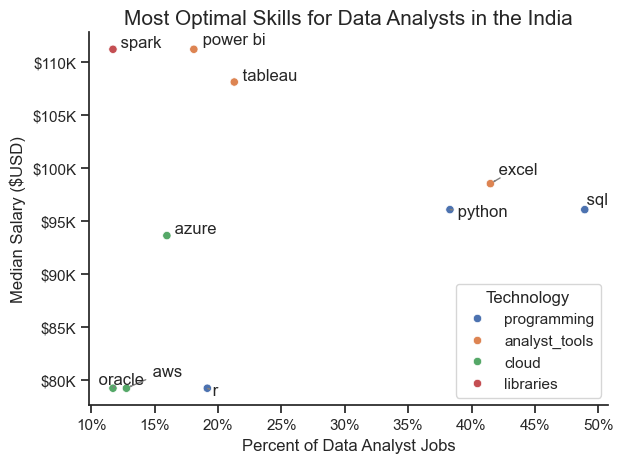

In [192]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text

sns.set_theme(style='ticks')

sns.scatterplot(
    data = df_DA_skills_tech_high_demand,
    x = 'skill_percent',
    y = 'median_salary',
    hue='technology'
)
sns.despine()

# Add labels to the scatter points
texts = []
for i, txt in enumerate(df_DA_skills_tech_high_demand['skills']):
    texts.append(plt.text(df_DA_skills_tech_high_demand['skill_percent'].iloc[i], df_DA_skills_tech_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust texts to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'), force_text=(0.5, 0.5))

# Set axis labels, title, and legend
plt.title("Most Optimal Skills for Data Analysts in the India", fontsize=15)
plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Salary ($USD)")
plt.legend(title="Technology", loc='lower right')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Adjust layout and display plot
plt.tight_layout()
plt.show()